## Нейросетевая библиотека PyTorch

In [1]:
import numpy as np
import torch
print(torch.__version__)

1.13.1+cu116


In [3]:
a = torch.tensor([[1,2],[3,4]],dtype=float)
a = torch.randn(size=(10,3))
a

tensor([[-0.5725, -0.1040,  0.6807],
        [ 1.6723, -0.7558, -2.0073],
        [ 1.4698,  1.0233,  0.4213],
        [-0.8209,  0.8029, -0.9274],
        [-1.0998,  0.5274,  0.1284],
        [ 0.0674,  0.1124, -0.0326],
        [-1.1702, -1.2863,  0.9757],
        [-0.3621, -0.2239,  0.8582],
        [ 1.2713,  0.8582, -0.3276],
        [-0.2387,  0.1378, -0.8210]])

In [4]:
torch.exp(a)-2*a

tensor([[1.7092, 1.1093, 0.6139],
        [1.9798, 1.9813, 4.1490],
        [1.4088, 0.7358, 0.6813],
        [2.0819, 0.6262, 2.2504],
        [2.5325, 0.6397, 0.8802],
        [0.9349, 0.8942, 1.0332],
        [2.6508, 2.8489, 0.7016],
        [1.4204, 1.2472, 0.6425],
        [1.0229, 0.6425, 1.3758],
        [1.2651, 0.8722, 2.0819]])

In [9]:
u = torch.tensor(5)
print(u.add(torch.tensor(3)))
print(u)
u.add_(torch.tensor(3))
print(u)

tensor(8)
tensor(5)
tensor(8)


#### Переменные и сумма матрицы по строкам

In [11]:
a = torch.randn(size=(5,5))
a

tensor([[-2.1570, -1.2690,  1.6740, -0.5170,  0.7219],
        [ 0.3379, -1.9608,  0.9911,  0.2208, -0.4174],
        [ 0.3506, -0.8864, -1.6838, -1.3194, -0.7380],
        [-0.2595,  1.5099,  2.0290,  0.3178, -0.3420],
        [ 1.6997, -0.8599,  0.1461,  0.1846, -1.3741]])

In [13]:
s = torch.zeros(size=(5,))
for x in a:
  s.add_(x)

s

tensor([-0.0282, -3.4662,  3.1565, -1.1132, -2.1496])

In [15]:
torch.sum(a,axis=0)

tensor([-0.0282, -3.4662,  3.1565, -1.1132, -2.1496])

#### Производные

In [21]:
a = torch.randn(size=(2,2),requires_grad=True)
b = torch.randn(size=a.shape)


In [22]:
def f(a,b): return torch.sqrt(torch.square(a)+torch.square(b))

f(a,b)

tensor([[0.5804, 0.2302],
        [0.8949, 1.6826]], grad_fn=<SqrtBackward0>)

In [23]:
c = torch.mean(f(a,b))
c.backward()
a.grad

tensor([[ 0.1263,  0.1817],
        [ 0.1357, -0.2141]])

#### Оптимизация функции градиентным спуском

In [51]:
import matplotlib.pyplot as plt

def f(x) : return torch.sum((x-torch.tensor([2.0,-1.0]))**2,axis=-1) - 3.0
# def f(x) : return (x[0]-2.0)**2 + (x[1]+1.0)**2 - 3.0

In [52]:
f(torch.tensor([[1.0,2.0],[2.0,3.0],[4,5]]))

tensor([ 7., 13., 37.])

In [53]:
U,V = np.meshgrid(np.linspace(-5,5,20),np.linspace(-5,5,20))

In [59]:
A = torch.tensor([U.astype(np.float32),V.astype(np.float32)]).permute(1,2,0)
A.shape

torch.Size([20, 20, 2])

In [61]:
f(A).shape

torch.Size([20, 20])

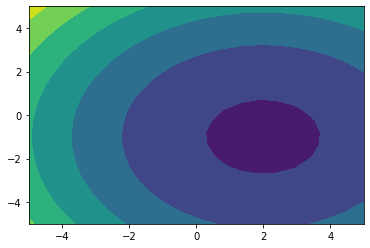

In [62]:
plt.contourf(U,V,f(A))

In [76]:
x = torch.tensor([-4.0,4.0],requires_grad=True)
eta = 0.2
hx = []
for _ in range(15):
  print(f"x={x}, f(x)={f(x)}")
  hx.append(x.detach().numpy().copy())
  z = f(x)
  z.backward()
  grad = x.grad
  x.data.add_(-eta*grad)
  x.grad.zero_()

x=tensor([-4.,  4.], requires_grad=True), f(x)=58.0
x=tensor([-1.6000,  2.0000], requires_grad=True), f(x)=18.959999084472656
x=tensor([-0.1600,  0.8000], requires_grad=True), f(x)=4.905599117279053
x=tensor([0.7040, 0.0800], requires_grad=True), f(x)=-0.15398406982421875
x=tensor([ 1.2224, -0.3520], requires_grad=True), f(x)=-1.9754341840744019
x=tensor([ 1.5334, -0.6112], requires_grad=True), f(x)=-2.6311564445495605
x=tensor([ 1.7201, -0.7667], requires_grad=True), f(x)=-2.8672163486480713
x=tensor([ 1.8320, -0.8600], requires_grad=True), f(x)=-2.952197790145874
x=tensor([ 1.8992, -0.9160], requires_grad=True), f(x)=-2.9827911853790283
x=tensor([ 1.9395, -0.9496], requires_grad=True), f(x)=-2.993804931640625
x=tensor([ 1.9637, -0.9698], requires_grad=True), f(x)=-2.997769832611084
x=tensor([ 1.9782, -0.9819], requires_grad=True), f(x)=-2.999197006225586
x=tensor([ 1.9869, -0.9891], requires_grad=True), f(x)=-2.999711036682129
x=tensor([ 1.9922, -0.9935], requires_grad=True), f(x)=-2

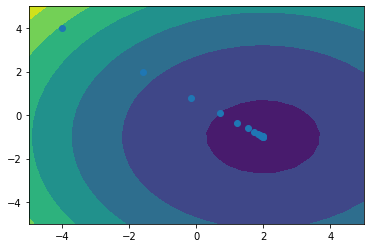

In [77]:
hx = np.array(hx)
plt.contourf(U,V,f(A))
plt.scatter(hx[:,0],hx[:,1])

## Регрессия на PyTorch

In [78]:
X = np.linspace(0,3,120)
Y = 2.0*X + 1.0 + np.random.normal(size=(120,))*0.5

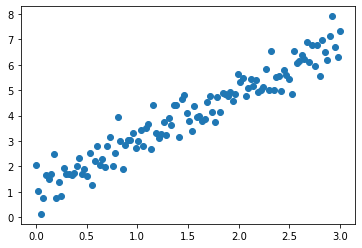

In [79]:
plt.scatter(X,Y)

In [92]:
w = torch.tensor([-1.0],requires_grad=True,dtype=torch.float32)
b = torch.zeros(size=(1,),requires_grad=True,dtype=torch.float32)

def f(x): return torch.matmul(x,w)+b

def loss(a,b):
  return torch.sum((a-b)**2)

Xt = torch.tensor(X,dtype=torch.float32).reshape(-1,1)
Yt = torch.tensor(Y,dtype=torch.float32)

loss(f(Xt),Yt)

tensor(4430.3491, grad_fn=<SumBackward0>)

In [93]:
eta = 0.002
for _ in range(50):
  z = loss(f(Xt),Yt)
  z.backward()
  w.data.add_(-eta*w.grad)
  b.data.add_(-eta*b.grad)
  w.grad.zero_()
  b.grad.zero_()
  print(f"w={w}, b={b}, loss={z}")


w=tensor([4.0245], requires_grad=True), b=tensor([2.6373], requires_grad=True), loss=4430.34912109375
w=tensor([-0.1155], requires_grad=True), b=tensor([0.3911], requires_grad=True), loss=3061.53125
w=tensor([3.3484], requires_grad=True), b=tensor([2.2038], requires_grad=True), loss=2118.375732421875
w=tensor([0.4981], requires_grad=True), b=tensor([0.6524], requires_grad=True), loss=1468.5050048828125
w=tensor([2.8865], requires_grad=True), b=tensor([1.8979], requires_grad=True), loss=1020.7094116210938
w=tensor([0.9244], requires_grad=True), b=tensor([0.8259], requires_grad=True), loss=712.1481323242188
w=tensor([2.5714], requires_grad=True), b=tensor([1.6812], requires_grad=True), loss=499.52227783203125
w=tensor([1.2210], requires_grad=True), b=tensor([0.9401], requires_grad=True), loss=352.9993591308594
w=tensor([2.3569], requires_grad=True), b=tensor([1.5270], requires_grad=True), loss=252.024658203125
w=tensor([1.4276], requires_grad=True), b=tensor([1.0143], requires_grad=True)

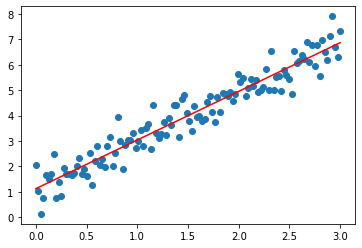

In [96]:
plt.scatter(X,Y)
with torch.no_grad():
  plt.plot(X,f(Xt),color='r')

## Вычисления на GPU

In [98]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"device={device}")

device=cuda


In [99]:
w = torch.tensor([-1.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(1,),requires_grad=True,dtype=torch.float32,device=device)

Xt = torch.tensor(X,dtype=torch.float32).reshape(-1,1).to(device)
Yt = torch.tensor(Y,dtype=torch.float32).to(device)

eta = 0.002
for _ in range(50):
  z = loss(f(Xt),Yt)
  z.backward()
  w.data.add_(-eta*w.grad)
  b.data.add_(-eta*b.grad)
  w.grad.zero_()
  b.grad.zero_()
  print(f"w={w}, b={b}, loss={z}")



w=tensor([4.0245], device='cuda:0', requires_grad=True), b=tensor([2.6373], device='cuda:0', requires_grad=True), loss=4430.34912109375
w=tensor([-0.1155], device='cuda:0', requires_grad=True), b=tensor([0.3911], device='cuda:0', requires_grad=True), loss=3061.529541015625
w=tensor([3.3484], device='cuda:0', requires_grad=True), b=tensor([2.2038], device='cuda:0', requires_grad=True), loss=2118.3759765625
w=tensor([0.4981], device='cuda:0', requires_grad=True), b=tensor([0.6524], device='cuda:0', requires_grad=True), loss=1468.505859375
w=tensor([2.8865], device='cuda:0', requires_grad=True), b=tensor([1.8979], device='cuda:0', requires_grad=True), loss=1020.7110595703125
w=tensor([0.9244], device='cuda:0', requires_grad=True), b=tensor([0.8259], device='cuda:0', requires_grad=True), loss=712.1494140625
w=tensor([2.5714], device='cuda:0', requires_grad=True), b=tensor([1.6812], device='cuda:0', requires_grad=True), loss=499.5229797363281
w=tensor([1.2210], device='cuda:0', requires_gra

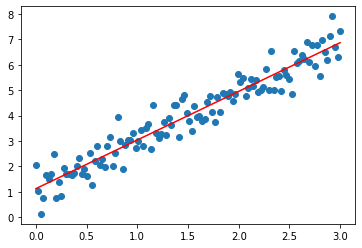

In [101]:
plt.scatter(X,Y)
with torch.no_grad():
  plt.plot(X,f(Xt).cpu(),color='r')

## Задача классификации

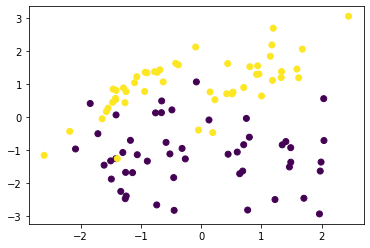

In [102]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,Y = make_classification(100,2,n_informative=2,n_redundant=0)
X = X.astype(np.float32)
Y = Y.astype(np.int32)
plt.scatter(X[:,0],X[:,1],c=Y)

In [112]:
W = torch.randn(size=(2,1),requires_grad=True)
b = torch.zeros(size=(1,),requires_grad=True)

def f(x):
  return torch.matmul(x,W)+b

In [113]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)
train_x.shape, train_y.shape

((80, 2), (80,))

In [114]:
lr = 0.1

def train_on_batch(x,y):
  z = f(x)
  loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)
  loss.backward()
  W.data.sub_(lr*W.grad)
  b.data.sub_(lr*b.grad)
  W.grad.zero_()
  b.grad.zero_()
  return loss

In [115]:
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x),torch.tensor(train_y,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

for ep in range(15):
  for x,y in dataloader:
    loss = train_on_batch(x,y.view(-1,1))
  print(f"Ep={ep}, loss={loss}")

Ep=0, loss=0.6450824737548828
Ep=1, loss=0.49566563963890076
Ep=2, loss=0.4119085669517517
Ep=3, loss=0.36280736327171326
Ep=4, loss=0.33196568489074707
Ep=5, loss=0.3113221526145935
Ep=6, loss=0.29677465558052063
Ep=7, loss=0.2860996425151825
Ep=8, loss=0.27801278233528137
Ep=9, loss=0.2717295289039612
Ep=10, loss=0.26674729585647583
Ep=11, loss=0.26273053884506226
Ep=12, loss=0.2594476342201233
Ep=13, loss=0.25673407316207886
Ep=14, loss=0.254469633102417


In [116]:
W,b

(tensor([[-0.2510],
         [ 1.5729]], requires_grad=True),
 tensor([-0.1420], requires_grad=True))

TypeError: ignored

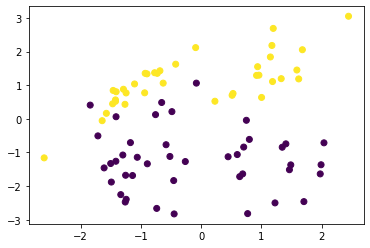

In [118]:
plt.scatter(train_x[:,0],train_x[:,1],c=train_y)
t = np.array([-2.0,3.0])
with torch.no_grad():
  plt.plot(t,(-b-t*W[0])/W[1])
  plt.ylim((-3,3))